<font color='green'> <font size = 8>     
## Character interaction network for the HBO series "Game of Thrones"##

<font color='black'> <font size = 4>  

**Sánchez Cortés Miguel Ángel**  
Facultad de Ciencias, UNAM.
    
miguel.sanchezcortes@ciencias.unam.mx

<font color='black'> <font size = 4>  <div style="text-align: justify">
First we have to import the packages we're going to use. Basically the important one is [NetworkX](https://networkx.org) which is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. [Matplotlib](https://matplotlib.org), [Numpy](https://numpy.org) and [Pandas](https://pandas.pydata.org) are very common packages for data manipulation, analysis and plotting. The [Powerlaw](https://pypi.org/project/powerlaw/) package is useful for the analysis of Heavy-Tailed Distributions that are very common in social/interaction networks.
<br>
<br>
The [EoN](https://epidemicsonnetworks.readthedocs.io/en/latest/EoN.html) package is a Python package for the simulation of epidemics on networks and solving ODE models of disease spread. It is based on the [Mathematics of Epidemics on Networks](https://www.springer.com/us/book/9783319508047) book by Kiss, Miller & Simon.

In [1]:
import networkx as nx #imports networkx as nx
import numpy as np #imports numpy as np
import matplotlib
import matplotlib.pyplot as plt #imports matplotlib.pyplot as plt
import pandas as pd #imports pandas as pd
import EoN
import powerlaw

<font color='blue'> <font size = 5>  
    
**1.- Main goal and data structure**

<font color='black'> <font size = 4>  <div style="text-align: justify">

Network science and data analysis is frequently used to quantify the inherent structures presented in the series of books written by George R.R. Martin named "A Song of Ice and Fire" due to its complexity and richness in detail.

<img src = "./Images/jonsnow.gif">

<font color='black'> <font size = 4><div style="text-align: justify">

In an [article](https://arxiv.org/abs/2012.01783) written last year, a group of researchers studied the character interaction network of the Game of Thrones series of books and they found that the network structure is approximately stable and comparable with **real social networks**, which partly confirms the reason why this books are so popular and easy to follow despite their fantastic plot.   
<br>
The objective of this Notebook is to make a similar analysis for the character interaction network of the Game of Thrones TV Show and observe quantitatively and cualitatively if it is also similar to **real social networks** or if it has new properties we can identify. Also, we're going to briefly analyze the characters centrality measures and the role they take on the plot and development of the series.

<font color='black'> <font size = 4> <div style="text-align: justify">

The [database](https://github.com/mathbeveridge/gameofthrones) we're going to use is divided in 16 files (2 for season, of those 2 files, one contains the nodes and the other one the edges of the season's network). These networks were created by parsing fan-generated [scripts](https://genius.com/artists/Game-of-thrones). Pairs of characters are connected by (undirected) edges weighted by the number of interactions.
<br>   
There are five interaction types. **Character A** and **Character B** are connected whenever:

- **Character A** speaks directly after **Character B**.
- **Character A** speaks about **Character B**.
- **Character C** speaks about **Character A** and **Character B**.
- **Character A** and **Character B** are mentioned in the same stage direction.
- **Character A** and **Character B** appear in a scene together.

<font color='black'> <font size = 4><div style="text-align: justify">
 
Lets make a pandas dataframe that contains the nodes and edges for each season of the series:

In [2]:
#We read the files for each season
s1 = pd.read_csv('./gameofthrones-master/data/got-s1-edges.csv',
            header = 0,
            usecols=[0, 1, 2])
s2 = pd.read_csv('./gameofthrones-master/data/got-s2-edges.csv',
            header = 0,
            usecols=[0, 1, 2])
s3 = pd.read_csv('./gameofthrones-master/data/got-s3-edges.csv',
            header = 0,
            usecols=[0, 1, 2])
s4 = pd.read_csv('./gameofthrones-master/data/got-s4-edges.csv',
            header = 0,
            usecols=[0, 1, 2])
s5 = pd.read_csv('./gameofthrones-master/data/got-s5-edges.csv',
            header = 0,
            usecols=[0, 1, 2])
s6 = pd.read_csv('./gameofthrones-master/data/got-s6-edges.csv',
            header = 0,
            usecols=[0, 1, 2])
s7 = pd.read_csv('./gameofthrones-master/data/got-s7-edges.csv',
            header = 0,
            usecols=[0, 1, 2])
s8 = pd.read_csv('./gameofthrones-master/data/got-s8-edges.csv',
            header = 0,
            usecols=[0, 1, 2])

<font color='black'> <font size = 4><div style="text-align: justify">
    
For example, the dataframe for season 8 looks like this:

In [3]:
s8

,Source,Target,Weight
0,DAENERYS,JON,194
1,DAENERYS,TYRION,122
2,JAIME,TYRION,122
3,BRIENNE,JAIME,121
4,JON,TYRION,116
...,...,...,...
548,TYRION,YARA,2
549,VALE_LORD,MAESTER_WOLKAN,2
550,VALE_LORD,YARA,2
551,VALE_LORD,YOHN_ROYCE,2


<font color='black'> <font size = 4><div style="text-align: justify">

As we can see, this dataframe contains 3 columns: **"Source"**, **"Target"** and **"Weight"**. The first two columns give us the names of the interacting characters and the third column gives us the number of times this characters interacted during the season, this information can help us build a directed or a weighted network. The original data contains an extra column named **"Season"** which gives us the season in which the characters interact, but for the purpose of this project we're going to ignore that information because it is irrelevant.

<font color='black'> <font size = 4><div style="text-align: justify">
    
To simplify our analysis, we're going to construct an **undirected weighted network** for each season and a **simple network** for the whole TV show. This will help us visualize the data in a better way and perform specific and general analysis depending on the case we're dealing with. Basically, we're going to use *small networks* to visualize de nodes and their importance and we're going to use a *big network* to observe global properties like the degree disttribution or the centrality measures.

In [4]:
#Creating the "big" dataframe
data = s1.append(s2).append(s3).append(s4).append(s5).append(s6).append(s7).append(s8)
data = data.reset_index().drop(columns=["index","Weight"])
data

,Source,Target
0,NED,ROBERT
1,DAENERYS,JORAH
2,JON,SAM
3,LITTLEFINGER,NED
4,NED,VARYS
...,...,...
4105,TYRION,YARA
4106,VALE_LORD,MAESTER_WOLKAN
4107,VALE_LORD,YARA
4108,VALE_LORD,YOHN_ROYCE


<font color='blue'> <font size = 5>  
    
**2.- Network visualization.**

<font color='black'> <font size = 4><div style="text-align: justify">
It is enlightening to observe some of the weighted networks we created for each season, this gives us information related with the plot and the importance of each character on the respective season.


In [5]:
#We create each network, from S1 to S8 and the "big" one
G1 = nx.from_pandas_edgelist(s1, source = 'Source', target = 'Target', edge_attr='Weight')
G2 = nx.from_pandas_edgelist(s2, source = 'Source', target = 'Target', edge_attr='Weight')
G3 = nx.from_pandas_edgelist(s3, source = 'Source', target = 'Target', edge_attr='Weight')
G4 = nx.from_pandas_edgelist(s4, source = 'Source', target = 'Target', edge_attr='Weight')
G5 = nx.from_pandas_edgelist(s5, source = 'Source', target = 'Target', edge_attr='Weight')
G6 = nx.from_pandas_edgelist(s6, source = 'Source', target = 'Target', edge_attr='Weight')
G7 = nx.from_pandas_edgelist(s7, source = 'Source', target = 'Target', edge_attr='Weight')
G8 = nx.from_pandas_edgelist(s8, source = 'Source', target = 'Target', edge_attr='Weight')
G = nx.from_pandas_edgelist(data, source = 'Source', target = 'Target')

<font color='black'> <font size = 4><div style="text-align: justify">

For season one, we visualize the network changing the edge width depending on the **weight** of each interaction, changing the size of each node depending on its **betweenness centrality** and changing the color of each node depending on its **PageRank centrality**.
<br>
    
The colormap for the nodes is the following:

<img src='./Images/autumn.png'>

In [6]:
#We define some dictionaries to control the width of the edges and the size/color of the nodes

tam=nx.betweenness_centrality(G1)
col=nx.pagerank(G1)

weights = np.array([i['Weight'] for i in dict(G1.edges).values()])
sizes = np.array([tam[i] for i in G1])
colors = np.array([col[i] for i in G1])

<font color='black'> <font size = 4><div style="text-align: justify">
    
It is best to observe only a few names in the network, that's why we can choose to show only the names of the nodes that have **more than 10 neighbors** (this normally coincides with the most important characters, but of course, this depends on the number of nodes).

In [7]:
#We define the dictionary with the labels of the network
labels1 = {
    list(G1.nodes)[n]: (list(G1.nodes)[n]
        if len(list(nx.all_neighbors(G1, list(G1.nodes)[n]))) > 10
        else '')
    for n in range(len(G1.nodes))
}

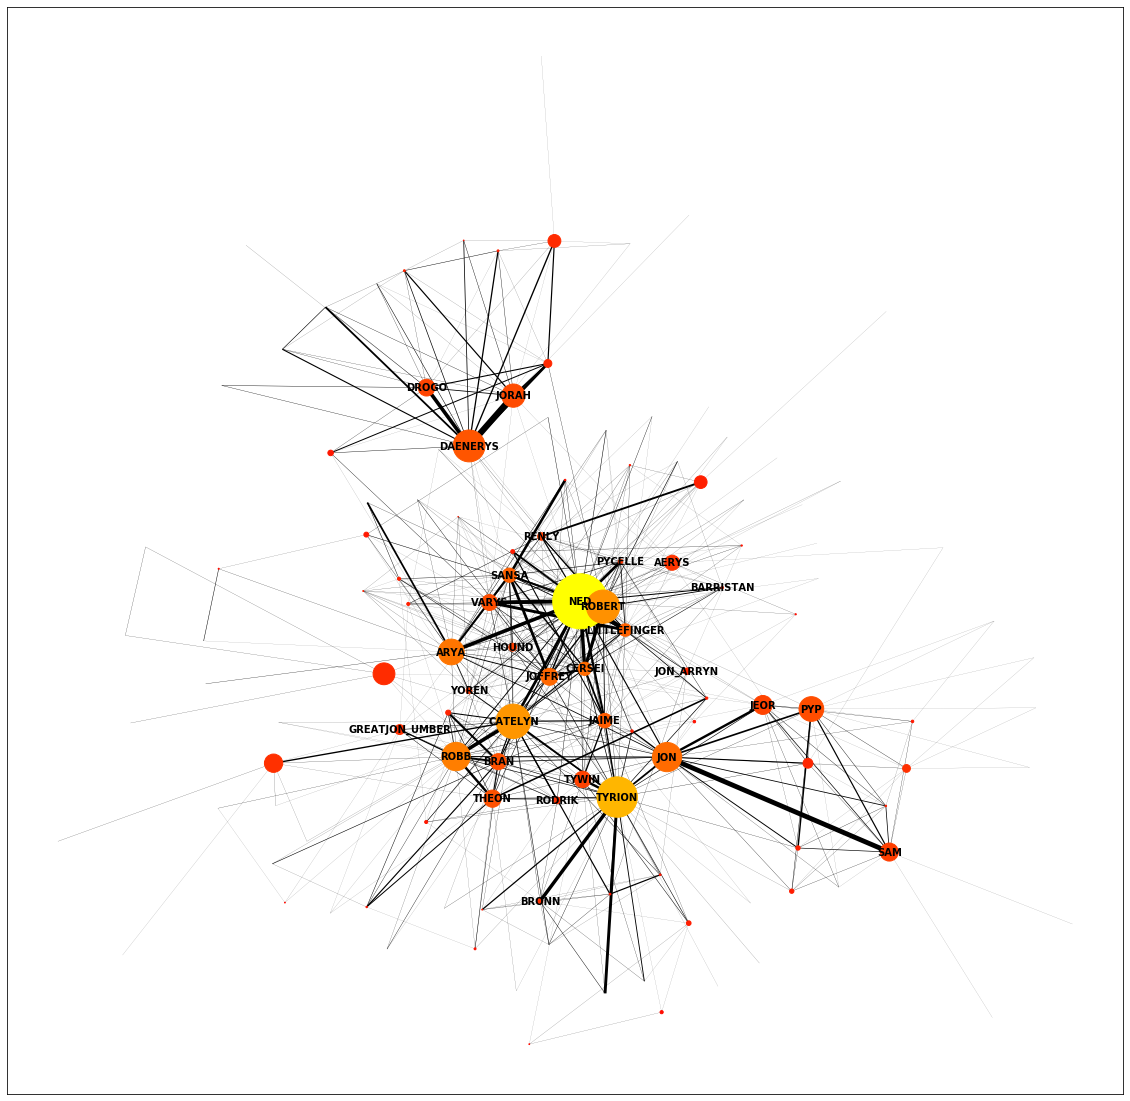

In [10]:
#Finally we plot the network
plt.figure(figsize = [20,20])

nx.draw_networkx_nodes(G1,
        pos=nx.kamada_kawai_layout(G1),
        node_size=10000*sizes,
        node_color=colors,
        cmap="autumn")

nx.draw_networkx_edges(G1,
        pos=nx.kamada_kawai_layout(G1),
        width=0.04*weights)

labels=nx.draw_networkx_labels(G1,
                        pos=nx.kamada_kawai_layout(G1),
                        labels=labels1,
                        font_size=10,
                        font_family="sans-serif",
                        font_weight="bold")

plt.savefig('./Images/S1-Network.png', dpi = 300)

<font color='black'> <font size = 4><div style="text-align: justify">
    
This graph gives us information of the season's plot regardless if we have watched it or not. In this season **Ned Stark** is one of the most influential characters beyond king **Robert Baratheon** and that's why he has the biggest pagerank and betweenness centralities. Other important nodes are **Catelyn Stark** and **Tyrion Lannister** which is consistent with the plot, given that she starts the main conflict and he travels a lot durirng the season, interacting with a lot of characters.
<br>
    
We can also observe several **communities** in the network that coincide with the different places where the series take place. We have the King's Landing community where **Ned**, **Varys**, **Littlefinger**, etc.. interact, then, the Dothraki community where **Daenerys**, **Jorah**, **Drogo**, etc... interact, or, the Night's Watch community where **Jon Snow** and it's fellas interact mainly throughout the season. 

<font color='black'> <font size = 4><div style="text-align: justify">
  
We can observe how the structure of the network changes drastically depending on the season, this is because some characters die, others become more important and new communities appear out of necessity or  the geographic situation of the main characters. We can observe the network for Season 3 doing the same thing that we did earlier:

In [11]:
#We define some dictionaries to control the width of the edges and the size/color of the nodes

tam=nx.betweenness_centrality(G3)
col=nx.pagerank(G3)

weights = np.array([i['Weight'] for i in dict(G3.edges).values()])
sizes = np.array([tam[i] for i in G3])
colors = np.array([col[i] for i in G3])

In [12]:
#We define the dictionary with the labels of the network, in this case, nodes with more than 5 neighbors
labels3 = {
    list(G3.nodes)[n]: (list(G3.nodes)[n]
        if len(list(nx.all_neighbors(G3, list(G3.nodes)[n]))) > 5
        else '')
    for n in range(len(G3.nodes))
}

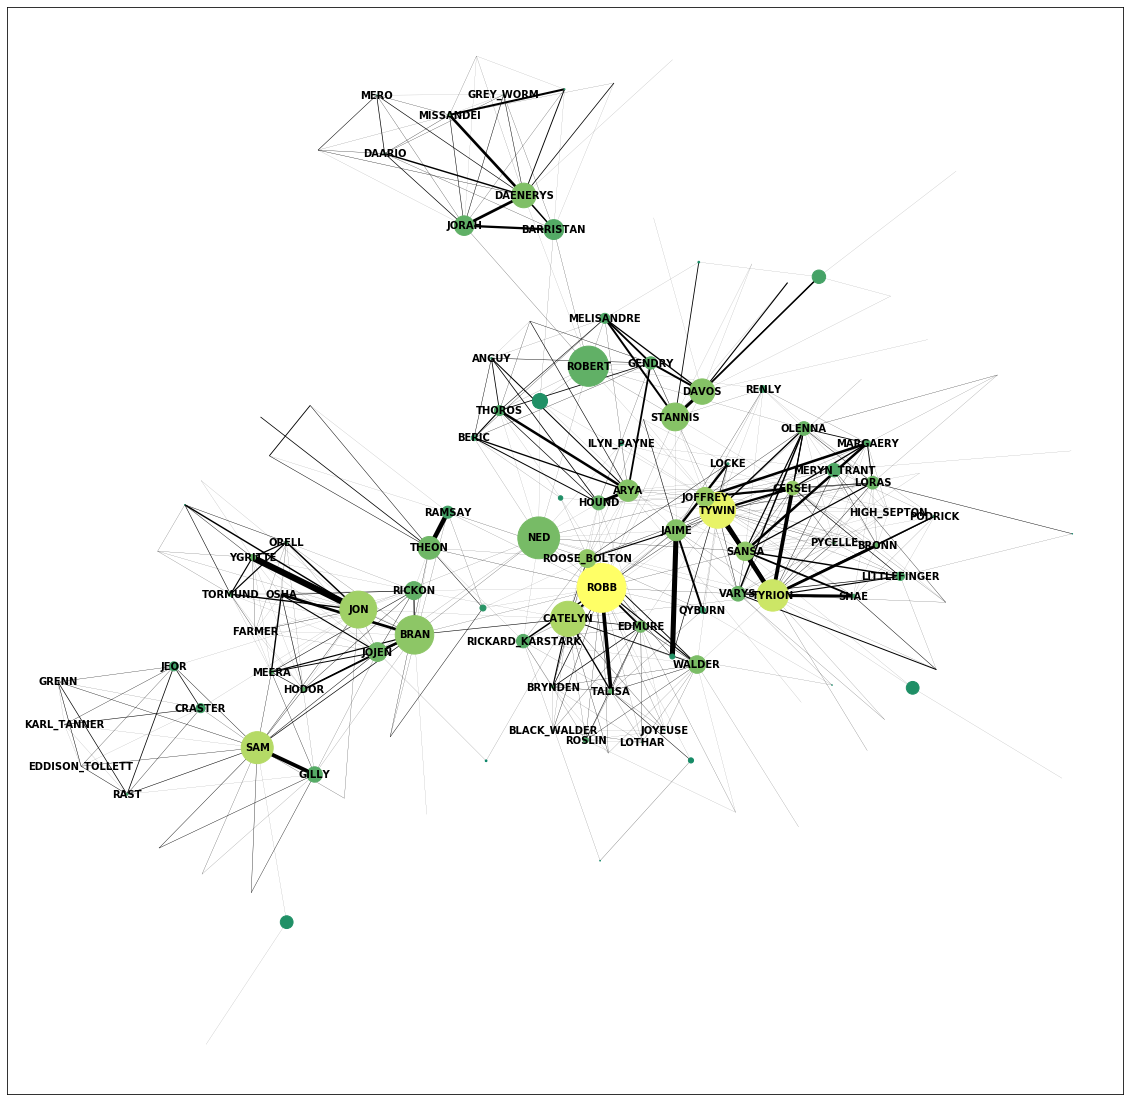

In [13]:
#Finally, we plot
plt.figure(figsize = [20,20])

nx.draw_networkx_nodes(G3,
        pos=nx.kamada_kawai_layout(G3),
        node_size=10000*sizes,
        node_color=colors,
        cmap="summer")

nx.draw_networkx_edges(G3,
        pos=nx.kamada_kawai_layout(G3),
        width=0.04*weights)

labels=nx.draw_networkx_labels(G3,
                        pos=nx.kamada_kawai_layout(G3),
                        labels=labels3,
                        font_size=10,
                        font_family="sans-serif",
                        font_weight="bold")

plt.savefig('./Images/S3-Network.png', dpi = 300)

<font color='black'> <font size = 4><div style="text-align: justify">
    
The colormap used in this case is the following:

<img src='./Images/summer.png'>

<font color='black'> <font size = 4><div style="text-align: justify">
  
As we can see, new influential nodes appear: **Robb Stark** and **Tywin Lannister**, this is because they are openly at war, with Robb being the self-proclamed "King in nthe North" and Tywin being the Hand of the King acting on behalf of his grandson **King Joffrey**. It is surprising to see **Ned** and **Robert** as main nodes despite being dead since S1, this tells us how they remain influential to the central plot of the war.

<font color='black'> <font size = 4><div style="text-align: justify">
    
Finally, it is interesting to see how the communities start to merge together during the series and in S8 they finally come together to fight the **Night King**. We can see this more graphically:

In [14]:
#We define some dictionaries to control the width of the edges and the size/color of the nodes

tam=nx.betweenness_centrality(G8)
col=nx.pagerank(G8)

weights = np.array([i['Weight'] for i in dict(G8.edges).values()])
sizes = np.array([tam[i] for i in G8])
colors = np.array([col[i] for i in G8])

In [15]:
#We define the dictionary with the labels of the network, in this case, nodes with more than 5 neighbors
labels8 = {
    list(G8.nodes)[n]: (list(G8.nodes)[n]
        if len(list(nx.all_neighbors(G8, list(G8.nodes)[n]))) > 5
        else '')
    for n in range(len(G8.nodes))
}

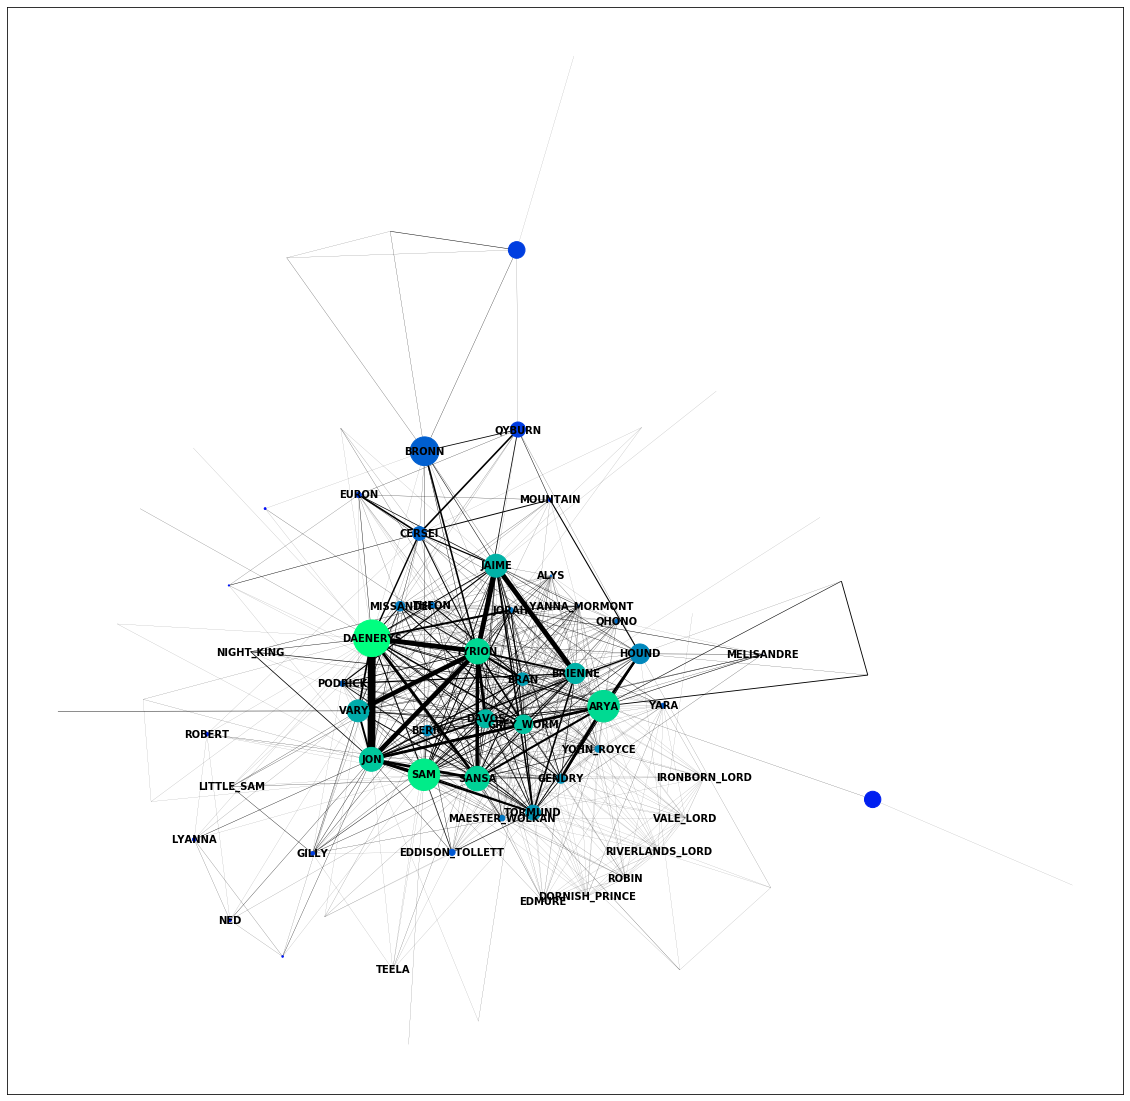

In [16]:
#Finally, we plot
plt.figure(figsize = [20,20])

nx.draw_networkx_nodes(G8,
        pos=nx.kamada_kawai_layout(G8),
        node_size=10000*sizes,
        node_color=colors,
        cmap="winter")

nx.draw_networkx_edges(G8,
        pos=nx.kamada_kawai_layout(G8),
        width=0.04*weights)

labels=nx.draw_networkx_labels(G8,
                        pos=nx.kamada_kawai_layout(G8),
                        labels=labels8,
                        font_size=10,
                        font_family="sans-serif",
                        font_weight="bold")

plt.savefig('./Images/S8-Network.png', dpi = 300)

<font color='black'> <font size = 4><div style="text-align: justify">
    
The colormap used in this case is the following:

<img src='./Images/winter.png'>

<font color='black'> <font size = 4><div style="text-align: justify">
    
We could do the same analysis for each season and find general information for the plot of the series, nevertheless, we can analyze the series in general and ask ourselves: Who is the protagonist of the series? Which are the most influential characters during the entire series?
<br>

We can answer this questions building the entire network of the series.

In [17]:
#We define some dictionaries to control the width of the edges and the size/color of the nodes

tam=nx.betweenness_centrality(G)
col=nx.pagerank(G)

sizes = np.array([tam[i] for i in G])
colors = np.array([col[i] for i in G])

In [18]:
#We define the dictionary with the labels of the network, in this case, nodes with more than 80 neighbors
labelsg = {
    list(G.nodes)[n]: (list(G.nodes)[n]
        if len(list(nx.all_neighbors(G, list(G.nodes)[n]))) > 80
        else '')
    for n in range(len(G.nodes))
}

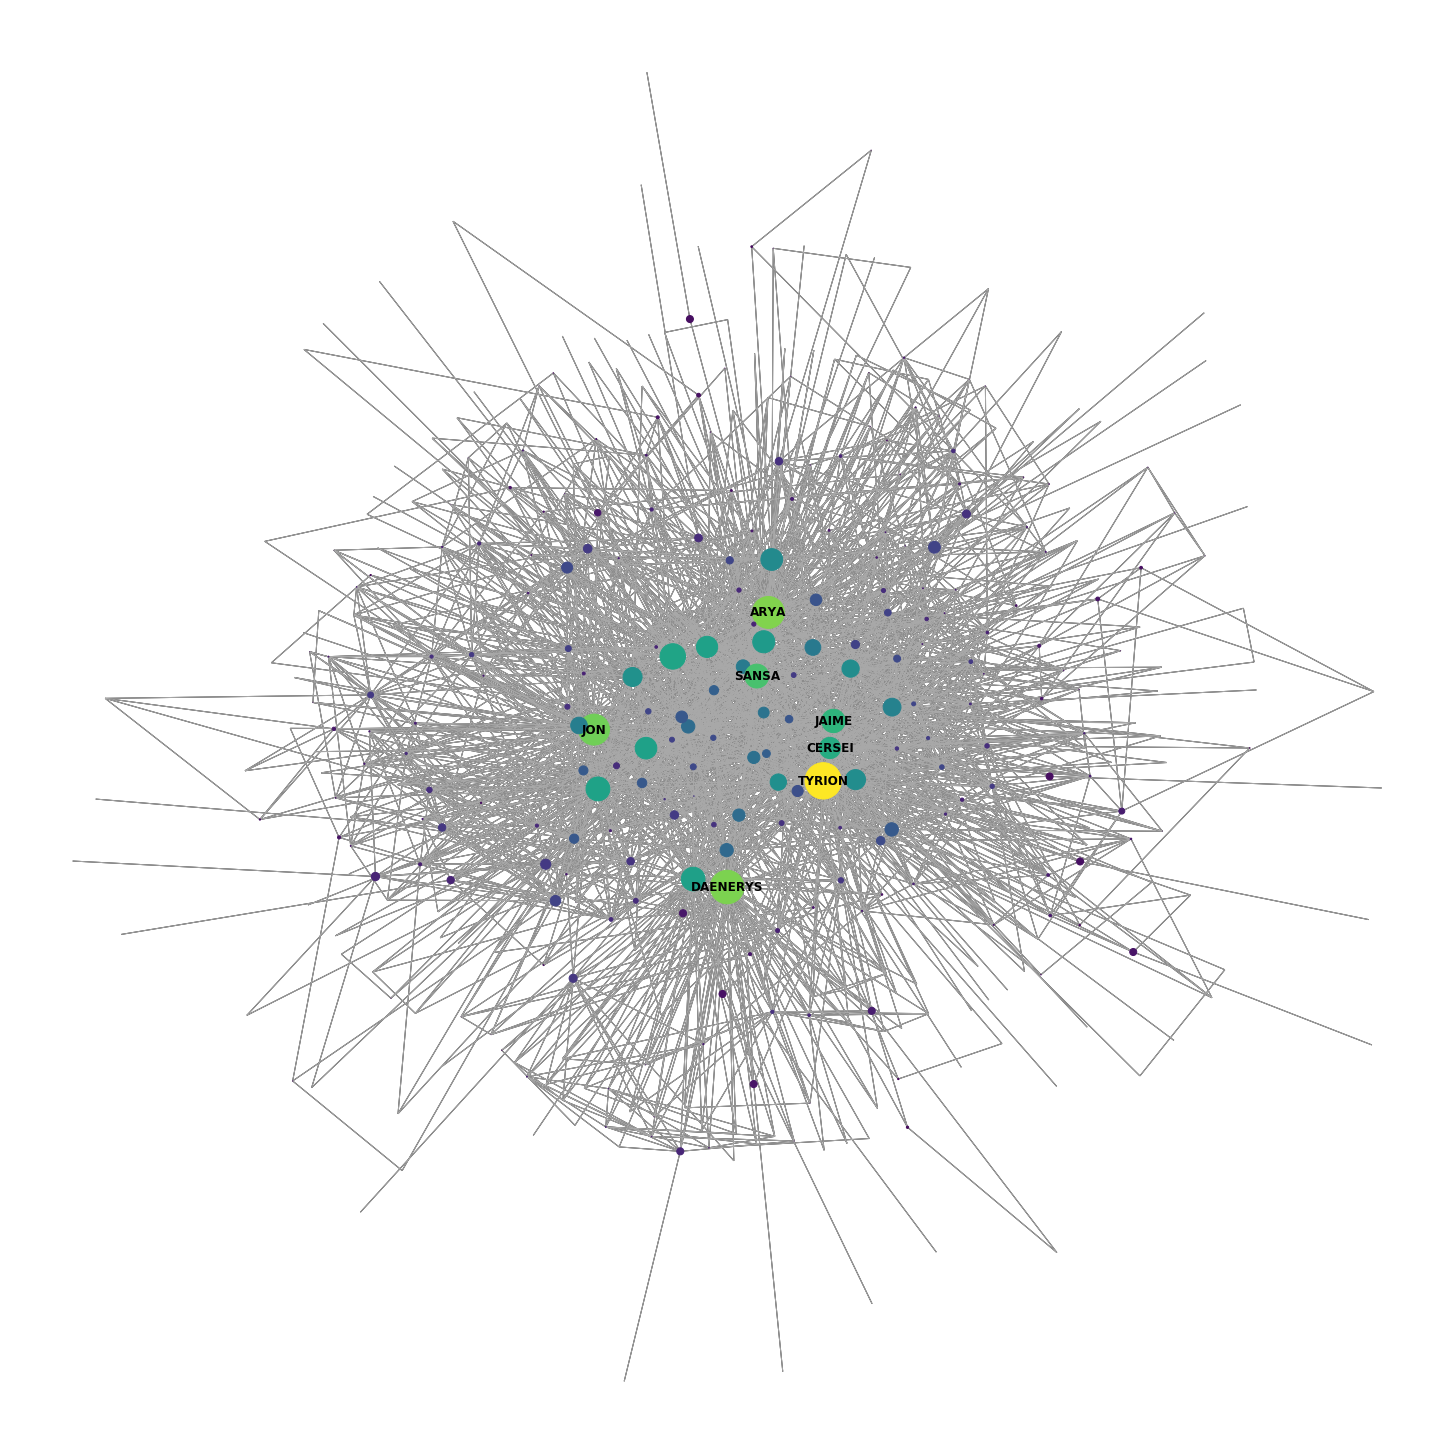

In [19]:
#Finally, we plot
plt.figure(figsize = [20,20])

nx.draw(G,
        pos=nx.kamada_kawai_layout(G),
        node_size=10000*sizes,
        node_color=colors,
        cmap="viridis")

nx.draw_networkx_edges(G,
        pos=nx.kamada_kawai_layout(G),
        edge_color="darkgray")

labels=nx.draw_networkx_labels(G,
                        pos=nx.kamada_kawai_layout(G),
                        labels=labelsg,
                        font_size=12,
                        font_color="black",
                        font_family="sans-serif",
                        font_weight="bold")

plt.savefig('./Images/GoT-Network.png', dpi = 300)

<font color='black'> <font size = 4><div style="text-align: justify">
    
The colormap used in this case is the following:

<img src='./Images/viridis.png'>

<font color='black'> <font size = 4><div style="text-align: justify">
    
As we can see, the most influential (and we could argue, the protagonist) character of the series is **Tyrion Lannister**, followed by other important nodes like **Jon Snow** and **Daenerys Targaryen**, this is consistent with the plot of the entire series, with Jon and Daenerys being the main contenders to the throne and having a romantic relationship.

<font color='blue'> <font size = 5>  
    
**3.- Global centrality measures and the degree distribution**

<font color='black'> <font size = 4><div style="text-align: justify">

We can visualize globally some of the centrality measures of the main network of the series. To make the plot less invasive, we represent the nodes in a **numeric** fashion instead of putting their names. In the X axis we have the nodes and in the Y axis we have the: **degree**, **betweenness** and **PageRank** centralities.

In [20]:
#We're going to use LaTeX for the plots
matplotlib.rcParams['text.usetex'] = True
plt.rc('font', family='serif')
plt.rc('text', usetex=True)

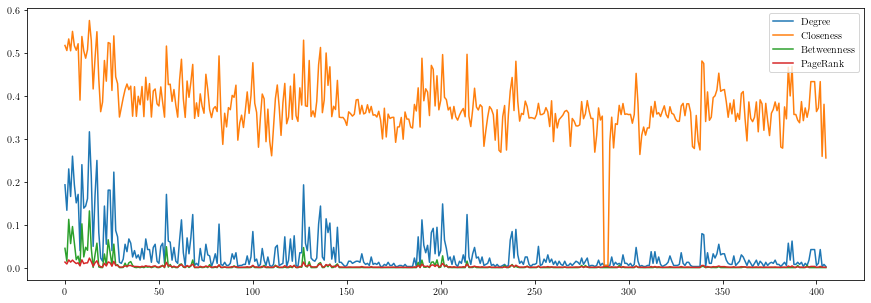

In [22]:
#Plotting
degree = nx.degree_centrality(G)
a = np.array([degree[i] for i in G])

closeness = nx.closeness_centrality(G)
b = np.array([closeness[i] for i in G])

betweenness = nx.betweenness_centrality(G)
c = np.array([betweenness[i] for i in G])

pagerank = nx.pagerank(G)
d = np.array([pagerank[i] for i in G])


plt.figure(figsize = [15, 5])
plt.plot(a, label = 'Degree')
plt.plot(b, label = 'Closeness')
plt.plot(c, label = 'Betweenness')
plt.plot(d, label = 'PageRank')


plt.legend()
plt.savefig('./Images/Centralities.png', dpi = 300)

<font color='black'> <font size = 4><div style="text-align: justify">
    
We also can obtain which node has the maximum and the minimum centralities, this is important to analyze some particular cases:

In [23]:
max_grad = max(degree, key=degree.get)
min_grad = min(degree, key=degree.get)

max_close = max(closeness, key=closeness.get)
min_close = min(closeness, key=closeness.get)

max_bet = max(betweenness, key=betweenness.get)
min_bet = min(betweenness, key=betweenness.get)

max_pr = max(pagerank, key=pagerank.get)
min_pr = min(pagerank, key=pagerank.get)

print("The node with maximum degree centrality is:", max_grad, "and the node with minimum degree centrality is:", min_grad)
print("The node with maximum closeness centrality is:", max_close, "and the node with minimum closeness centrality is:", min_close)
print("The node with maximum betweenness centrality is:", max_bet, "and the node with minimum betweenness centrality is:", min_bet)
print("The node with maximum pagerank centrality is:", max_pr, "and the node with minimum pagerank centrality is:", min_pr)

The node with maximum degree centrality is: TYRION and the node with minimum degree centrality is: STABLE_BOY
The node with maximum closeness centrality is: TYRION and the node with minimum closeness centrality is: BLACK_JACK
The node with maximum betweenness centrality is: TYRION and the node with minimum betweenness centrality is: MIRRI_MAZ_DUUR
The node with maximum pagerank centrality is: TYRION and the node with minimum pagerank centrality is: MARTHA


<font color='black'> <font size = 4><div style="text-align: justify">
    
It is no surprise that **Tyrion** dominates every centrality measure, it is the most connected node, the closest node, the most intermediate node and the most influential node. Also, the nodes with very small centrality measures mainly are secondary characters or characters that appear a few times during the series and have no influence whatsoever in the plot.

<font color='black'> <font size = 4><div style="text-align: justify">
    
We can also obtain the **degree distribution** off the global nnetwork to observe the main properties of the network. First, we build a dictionary with the degreees of the nodes and then we count which ones have the same degree:

In [24]:
#We generate de degree dictionary
dictionary = dict(G.degree)
degrees = [ dictionary[i] for i in G]

In [25]:
#We enumerate the nodes with same degree
distribution = {}

for i in degrees:
    distribution[i] = 0

for i in degrees:
    distribution[i] += 1

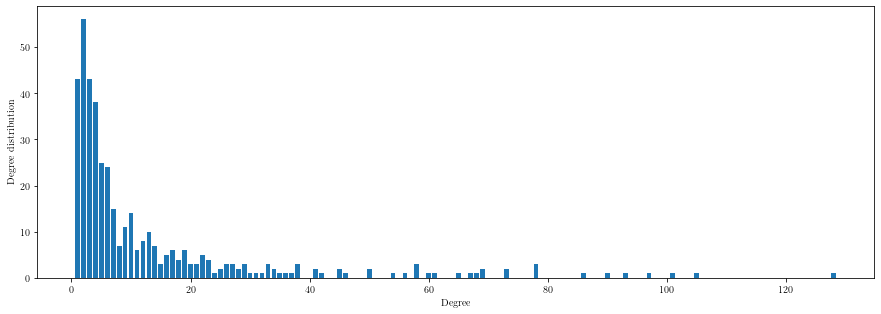

In [32]:
#Plotting
plt.figure(figsize = [15, 5])
X = distribution.keys()
Y = distribution.values()

plt.xlabel("Degree")
plt.ylabel("Degree distribution")

plt.bar(X,Y)

plt.savefig('./Images/DegreeDist.png', dpi = 300)

<font color='black'> <font size = 4><div style="text-align: justify">
    
We can see all that mainly all the nodes have a degree between 0 and 20 and nodes with very big degree are rare. This is very common in real networks and this distribution is known as a **heavy-tailed distribution** which is common in networks with few *hubs*.
<br>
    
We can make the same plot in logarithmic scale to analyze in a different way the distribution: 

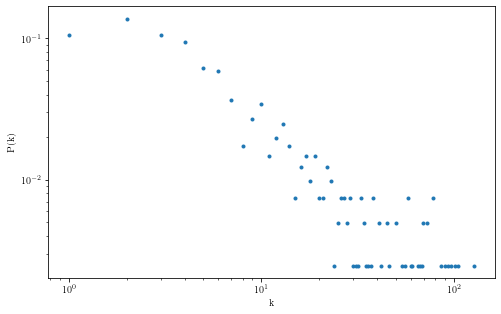

In [33]:
#We create an array with the degrees 
k = np.array(list(dict(G.degree).values()))

#We plot the distribution in log-log scale
K = k.max()
y0, x0 = np.histogram(k,
                      bins = range(int(K) + 2),
                      density = True)

plt.figure(figsize = [8,5])
plt.plot(x0[:-1], y0, '.')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.xscale('log')
plt.yscale('log')

plt.savefig('./Images/DegreeDist-log.png', dpi = 300)

<font color='black'> <font size = 4><div style="text-align: justify">
    
We can see that approximately there exists a region where this network seems to be similar to a **scale-free network** and it's degree distribution can be adjusted to a power-law distribution (a straight line in log-log scale). If we use a *logarithmic bin* we can see this phenomenon more clearly:

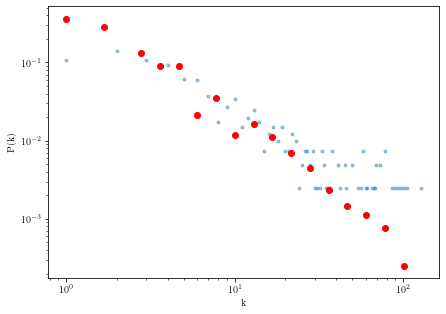

In [35]:
#logarithmic bin histogram
log_bins = np.logspace(0, np.log10(K+2), 20)

y, x = np.histogram(k,
                    bins = log_bins,
                    density = True,
                    )

plt.figure(figsize = [7,5])
plt.plot(x0[:-1], y0, '.', alpha = .4)

plt.plot(x[:-1], y, 'ro')
plt.xlabel('k')
plt.ylabel('P(k)')

plt.xscale('log')
plt.yscale('log')

plt.savefig('./Images/DegreeDist-logbin.png', dpi = 300)

<font color='black'> <font size = 4><div style="text-align: justify">
    
We can adjust a power law distribution using the **PowerLaw** Python package. Theoretically, the degree distribution for a scale free network has the following form:
    
$$ p(k)= (\alpha -1)k_{min}^{\alpha-1}k^{-\alpha} $$
    
So, basically we need to find the parameter $\alpha$:

In [36]:
#First we obtain a list with the degrees of the network
degrees = list(dict(G.degree).values())
#We find the powerlaw fit
fit = powerlaw.Fit(degrees)
#We print the alpha parameter
print("The alpha exponent is:", fit.alpha)

The alpha exponent is: 2.3848512581271892


Calculating best minimal value for power law fit
/Users/miguelangel/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


<font color='black'> <font size = 4><div style="text-align: justify">

We can graph the data in *log-log* scale and it's power law fit:

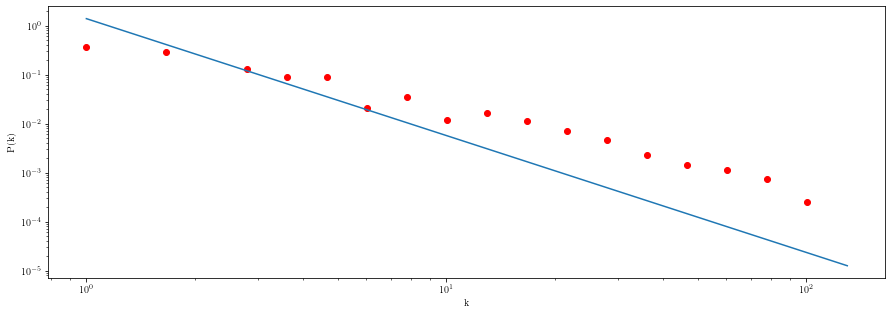

In [38]:
#We define c
c=(fit.alpha-1)*min(degrees)**(fit.alpha-1)
#We Plot
plt.figure(figsize = [15,5])
plt.plot(x[:-1], y, 'ro')
plt.plot(x, c*x**(-fit.alpha))
plt.xscale('log')
plt.yscale('log')

plt.xlabel('k')
plt.ylabel('P(k)')

plt.savefig('./Images/DegreeDist-powerlaw.png', dpi = 300)

<font color='black'> <font size = 4><div style="text-align: justify">
    
As we can see this is very approximate and not very accurate. Nevertheless the $\alpha$ value is not that far from the value we find in a Barabasi-Alberts network (in this case $\alpha \approx 3$), which can show us that in a sense this network **is** similar to several social networks despite it being a fictitious network.

<font color='blue'> <font size = 5>  
    
**3.-Simulating an epidemic.**

<font color='black'> <font size = 4><div style="text-align: justify">
    
Epidemic simulation is very famous nowadays due to the COVID-19 spread and the [EoN](https://epidemicsonnetworks.readthedocs.io/en/latest/EoN.html) package is a very didactic tool to show how we could simulate disease in a network. In this case I tried to simulate a "zombie-like" disease with a high transmission coefficient using a SIR (Susceptible-Infected-Recovered) model.
<br>
    
To make the simulations interesting, we make this analysis for several seasons of the series because the structure of the network is different and so the transmission of the disease.

<font color='black'> <font size = 4><div style="text-align: justify">

First, it is useful to rename the network nodes with numbers, so when we visualize the transmission network we don't lose detail.

In [39]:
#For S1
nodes1=list(G1.nodes)
mapping1 = {nodes1[i]:i for i in range(len(list(G1.nodes)))}
E1 = nx.relabel_nodes(G1, mapping1)

#For S3
nodes3=list(G3.nodes)
mapping3 = {nodes3[i]:i for i in range(len(list(G3.nodes)))}
E3 = nx.relabel_nodes(G3, mapping3)

#For S8
nodes8=list(G8.nodes)
mapping8 = {nodes8[i]:i for i in range(len(list(G8.nodes)))}
E8 = nx.relabel_nodes(G8, mapping8)

<font color='black'> <font size = 4><div style="text-align: justify">
    
Haciendo la simulación de un modelo SIR para la red de la primera temporada:

In [40]:
#tau is the transmission speed per edge
tau=0.8
#gamma is the recovery speed per node
gamma=0.5
#rho is the initial fraction of infected nodes. None means we choose a node at random.
rho=None
#transmission_weight gives a weighted transmission it is None by default
weights='Weight'

#Simulating
t, S, I, R = EoN.fast_SIR(E1,tau,gamma,rho,transmission_weight=weights)

<font color='black'> <font size = 4><div style="text-align: justify">
    
We can plot the Susceptible, Infected and Recovered nodes:

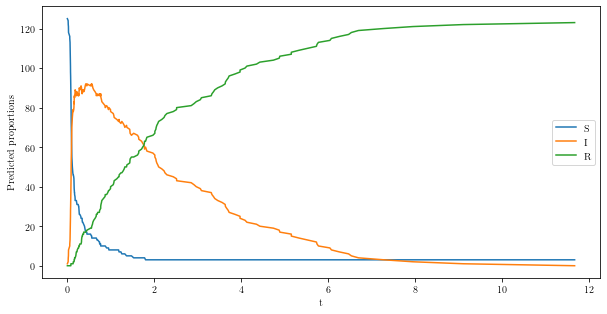

In [48]:
#Plotting
plt.figure(figsize = [10,5])
plt.plot(t, S, label = 'S')
plt.plot(t, I, label = 'I')
plt.plot(t, R, label = 'R')
plt.xlabel('t')
plt.ylabel('Predicted proportions')
plt.legend()
plt.savefig('./Images/SIR-S1.png', dpi = 300)

<font color='black'> <font size = 4><div style="text-align: justify">
   
As we can see the number of susceptible nodes decreases drastically because we simulated a very infectious disease ($\tau=0.8$) and there are edges with a lot of weight with high probability of being infected. Similarly, the number of infected nodes grows exponentially and then decreases exponentially (but with less speed), this is because the recovery rate is not that small ($\gamma=0.5$).
<br>

We can also see a real time snapshot of the evolution of the epidemic with the following code:

In [44]:
#We define the parameters of the graph
weights = np.array([i['Weight'] for i in dict(E1.edges).values()])


nx_kwargs = {"pos":nx.kamada_kawai_layout(E1), 
             "width":0.04*weights, 
             "with_labels":True,
             "font_size":2, 
             "font_weight":"bold",
             "font_family":"sans-serif"}

#We simulate

sim = EoN.fast_SIR(E1,tau,gamma,rho,transmission_weight='Weight', return_full_data=True)

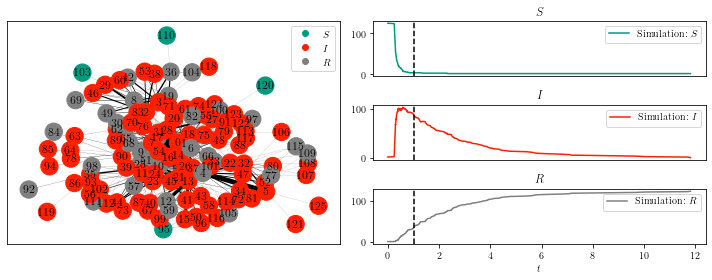

In [46]:
#Plot
sim.display(time = 1, **nx_kwargs) 
plt.savefig('./Images/SIR-S1-sim.png', dpi = 300)

<font color='black'> <font size = 4><div style="text-align: justify">
    
We can see that given a step of time we have several infected nodes and only a few susceptible nodes, which we could think are the isolated ones and with less weight.

<font color='black'> <font size = 4><div style="text-align: justify">
    
We can also plot the transmission tree to see the evolution of the disease more clearly:

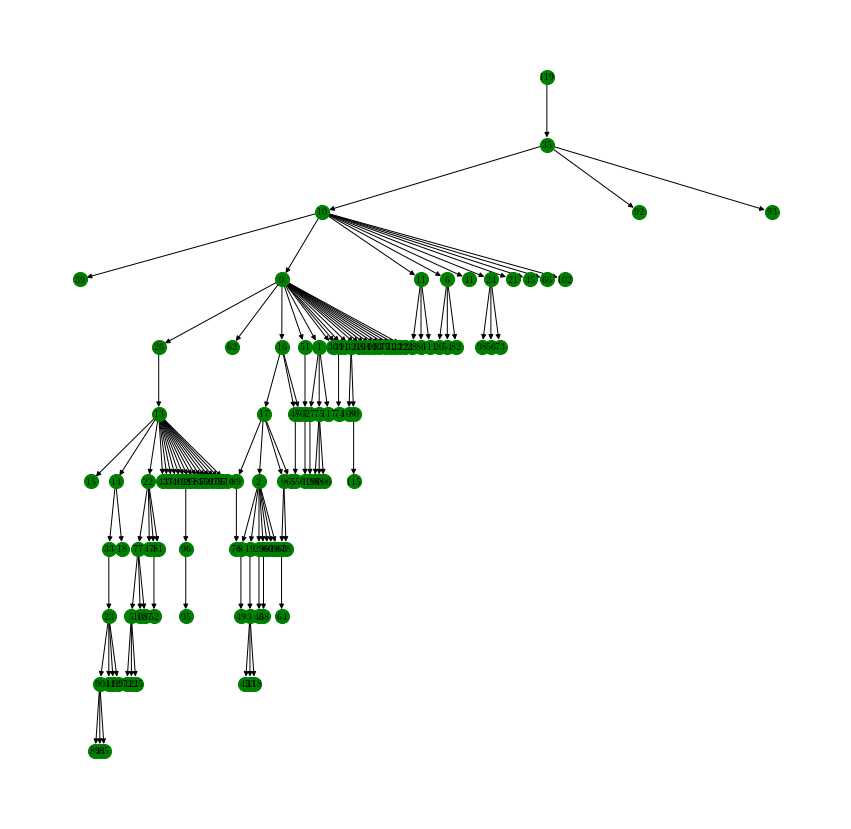

In [49]:
#We define the transmission tree and hierarchy network
T = sim.transmission_tree()
Tpos = EoN.hierarchy_pos(T)
#We plot
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
nx.draw(T, Tpos, ax=ax, node_color ='green' ,node_size = 200, with_labels=True, font_size=10, font_weight= "bold",font_family="sans-serif")
plt.savefig('./Images/SIR-S1-TT.png', dpi = 300)

<font color='black'> <font size = 4><div style="text-align: justify">
    
This coincides with the idea that the most important nodes are the ones that transmit the disease more efficiently. It also shows that the evolution of the disease depends on which node it starts.

<font color='black'> <font size = 4><div style="text-align: justify">
    
We could do the same procedure for S3 and S8 to contrast and to make this project more complete.
<br>

For season 3:

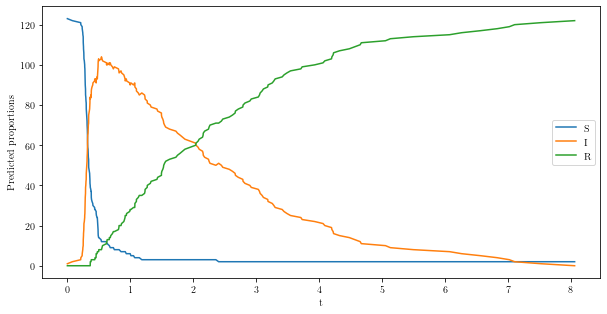

In [51]:
#tau is the transmission speed per edge
tau=0.8
#gamma is the recovery speed per node
gamma=0.5
#rho is the initial fraction of infected nodes. None means we choose a node at random.
rho=None
#transmission_weight gives a weighted transmission it is None by default
weights='Weight'

#Simulating
t, S, I, R = EoN.fast_SIR(E3,tau,gamma,rho,transmission_weight=weights)

#Plotting
plt.figure(figsize = [10,5])
plt.plot(t, S, label = 'S')
plt.plot(t, I, label = 'I')
plt.plot(t, R, label = 'R')
plt.xlabel('t')
plt.ylabel('Predicted proportions')
plt.legend()
plt.savefig('./Images/SIR-S3.png', dpi = 300)

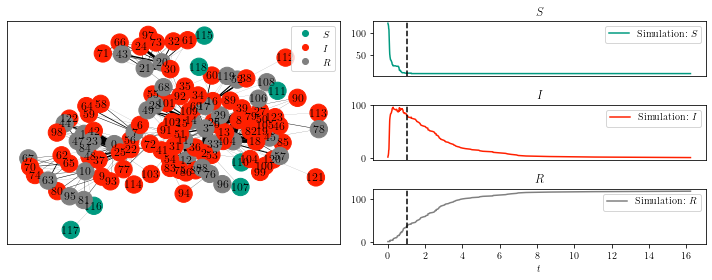

In [52]:
#We define the parameters of the graph
weights = np.array([i['Weight'] for i in dict(E3.edges).values()])


nx_kwargs = {"pos":nx.kamada_kawai_layout(E3), 
             "width":0.04*weights, 
             "with_labels":True,
             "font_size":2, 
             "font_weight":"bold",
             "font_family":"sans-serif"}

#We simulate

sim = EoN.fast_SIR(E3,tau,gamma,rho,transmission_weight='Weight', return_full_data=True)

#Plot
sim.display(time = 1, **nx_kwargs) 
plt.savefig('./Images/SIR-S3-sim.png', dpi = 300)

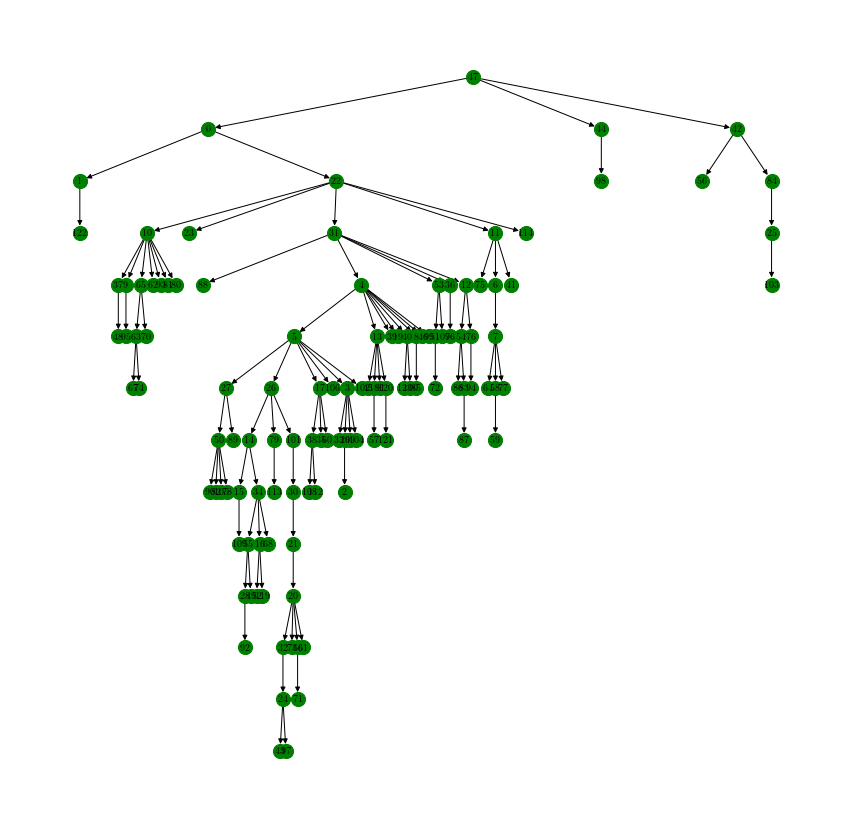

In [53]:
#We define the transmission tree and hierarchy network
T = sim.transmission_tree()
Tpos = EoN.hierarchy_pos(T)
#We plot
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
nx.draw(T, Tpos, ax=ax, node_color ='green' ,node_size = 200, with_labels=True, font_size=10, font_weight= "bold",font_family="sans-serif")
plt.savefig('./Images/SIR-S3-TT.png', dpi = 300)

<font color='black'> <font size = 4><div style="text-align: justify">
    
Finally, for season 8:

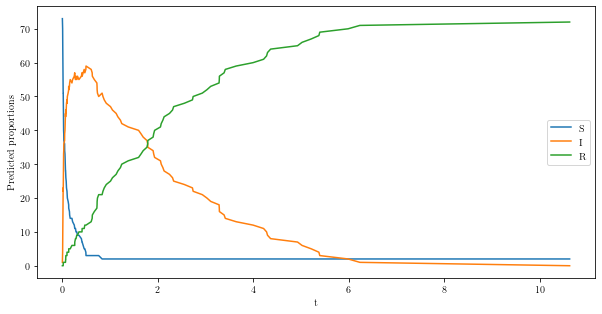

In [54]:
#tau is the transmission speed per edge
tau=0.8
#gamma is the recovery speed per node
gamma=0.5
#rho is the initial fraction of infected nodes. None means we choose a node at random.
rho=None
#transmission_weight gives a weighted transmission it is None by default
weights='Weight'

#Simulating
t, S, I, R = EoN.fast_SIR(E8,tau,gamma,rho,transmission_weight=weights)

#Plotting
plt.figure(figsize = [10,5])
plt.plot(t, S, label = 'S')
plt.plot(t, I, label = 'I')
plt.plot(t, R, label = 'R')
plt.xlabel('t')
plt.ylabel('Predicted proportions')
plt.legend()
plt.savefig('./Images/SIR-S8.png', dpi = 300)

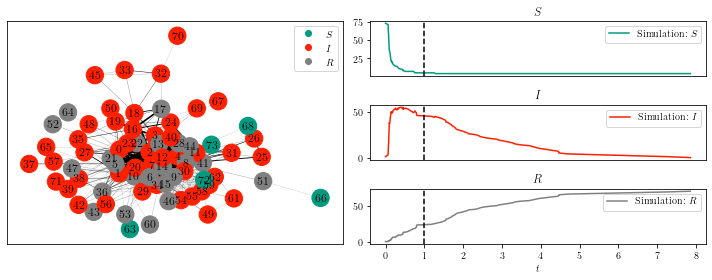

In [55]:
#We define the parameters of the graph
weights = np.array([i['Weight'] for i in dict(E8.edges).values()])


nx_kwargs = {"pos":nx.kamada_kawai_layout(E8), 
             "width":0.04*weights, 
             "with_labels":True,
             "font_size":2, 
             "font_weight":"bold",
             "font_family":"sans-serif"}

#We simulate

sim = EoN.fast_SIR(E8,tau,gamma,rho,transmission_weight='Weight', return_full_data=True)

#Plot
sim.display(time = 1, **nx_kwargs) 
plt.savefig('./Images/SIR-S8-sim.png', dpi = 300)

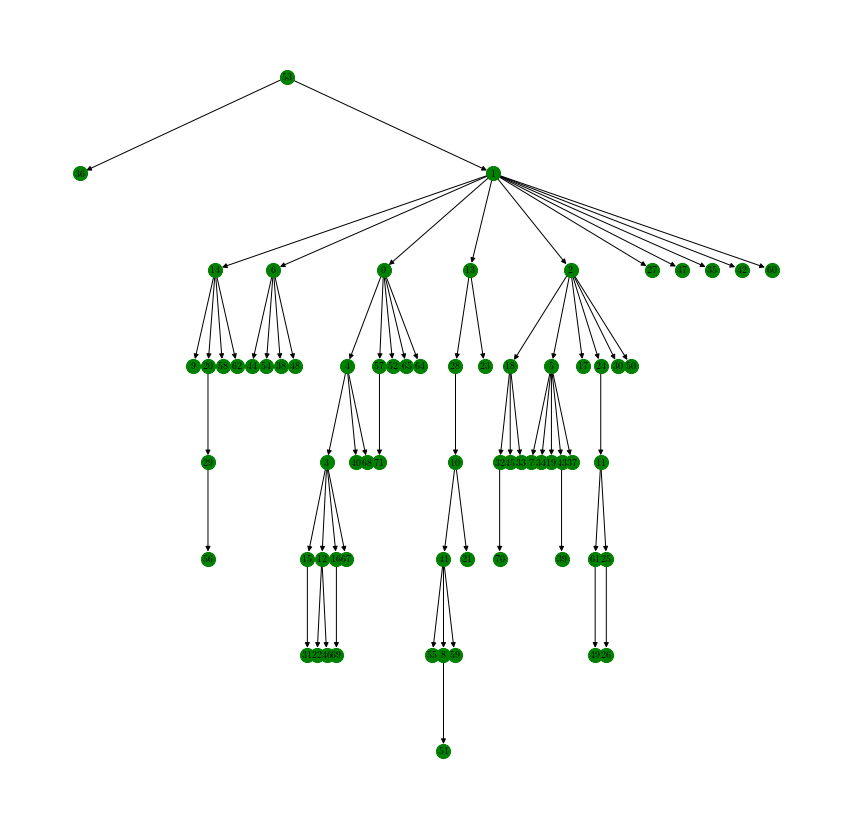

In [56]:
#We define the transmission tree and hierarchy network
T = sim.transmission_tree()
Tpos = EoN.hierarchy_pos(T)
#We plot
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
nx.draw(T, Tpos, ax=ax, node_color ='green' ,node_size = 200, with_labels=True, font_size=10, font_weight= "bold",font_family="sans-serif")
plt.savefig('./Images/SIR-S8-TT.png', dpi = 300)

<font color='blue'> <font size = 5>  
    
**4.-Summary.**

<font color='black'> <font size = 4><div style="text-align: justify">
    
The purpose of this project was to show some of the properties of the Game of Thrones network and it's similarity with real world networks, we could also see how it approximates a scale-free network and how it seems that Tyrion Lannister is the protagonist of the show. Finally, we simulated an epidemic in the Westerosi map and used some visualization tools for better understanding the simulation.

<font color='blue'> <font size = 5>  
    
**5.-References.**

<font color='black'> <font size = 4><div style="text-align: justify">
    
- Original data from: https://github.com/mathbeveridge/gameofthrones
- [Network Science](http://networksciencebook.com) by Albert-László Barabási.
- Networks: an Introduction, M.E.J. Newman.